### Tutorial 6 - How Use the ApplyPatches Operator

In this tutorial, we will show you how use the ApplyPatches operator, that subdivides a chunk in Patches with a given shape and apply a function at each patch. 
It is possible to define overlapping patch sets to create a similar effect of a sliding window. The recombination of the results can be done either using a Weighted Average or Voting methods.

This operator is userful when applying functions with a fixed input size (e.g. Deep Learning models), this way the interface between two neighboring patches can be smoothed due to the overlapping patches and the employement of different weight functions.


![title](tutorial_6_schematic.jpg)

#### Basic Usage

In [1]:
import numpy as np

from dasf.transforms.operations import ApplyPatchesWeightedAvg

def func(X):
    print(X.shape) # show input of 
    return X + 1

data = np.zeros((99, 99, 99))

# Here we apply only on the small cube (50, 50, 50) as its the only whole patch that can be extracted.
# Fails when using Dask arrays
patches_op = ApplyPatchesWeightedAvg(
    function=func,
    weight_function=None, # Defaults to Arithmetic Mean
    input_size=(50, 50, 50),
    overlap=None, 
    offsets=[],
)
out_1 = patches_op.transform(data)
print(f"Output shape is only {out_1.shape}, because its the only whole patch that can be extarcted without overlap/padding. Only 1 patch extarcted")

# Adding overlap (from Dask) it will pad the chunk/numpy array with the specified value 
# or get the values from neighboring chunks
patches_op = ApplyPatchesWeightedAvg(
    function=func,
    weight_function=None, # Defaults to Arithmetic Mean
    input_size=(50, 50, 50),
    overlap={"padding": (1, 1, 1), "boundary": 0},
    offsets=[],
)
out_2 = patches_op.transform(data)
print(f"Now the output shape is {out_2.shape}, because we added an overlap/padding that makes it possible to extract patches that cover the whole data. 8 patches extracted")

# Adding overlap (from Dask) it will pad the chunk/numpy array with the specified value 
# or get the values from neighboring chunks
patches_op = ApplyPatchesWeightedAvg(
    function=func,
    weight_function=None, # Defaults to Arithmetic Mean
    input_size=(50, 50, 50),
    overlap={"padding": (1, 1, 1), "boundary": 0},
    offsets=[(0, -1, -1)],
)
out_3 = patches_op.transform(data)
print(f"The output shape is {out_3.shape} is the same, but we compute 8 patches from the base set and 8 from an overlapping set (patch extraction starts at (0, -1, -1), instead of (0, 0, 0))")


(50, 50, 50)
Output shape is only (50, 50, 50), because its the only whole patch that can be extarcted without overlap/padding. Only 1 patch extarcted
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
Now the output shape is (99, 99, 99), because we added a overlap/padding that makes it possible to extarct patches that cover the whole data. 8 patches extracted
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
(50, 50, 50)
The output shape is (99, 99, 99) is the samebut we compute 8 patches from the base set and 8 from an overlapping set (patch extraction starts at (0, -1, -1), instead of (0, 0, 0))


#### Using different weight functions
Weight functions can be passed to the ApplyPatches operator in order to attribute weights based on the position of a given point in the NDArray.

Below we show the Gaussian and Radial weight functions

In [46]:
from dasf.utils.funcs import weight_gaussian, weight_radial
import matplotlib.pyplot as plt
import numpy as np

In [47]:
weights = {
    "Gaussian": weight_gaussian((100, 100, 100)),
    "Radial": weight_radial((100, 100, 100))
}

In [48]:
def plot_panel(base_name, data_dict, outer):
    f, axarr = plt.subplots(1,len(data_dict), sharex = True,sharey=True)
    f.set_size_inches(15,5)
    for i, data in enumerate(data_dict.items()):
        ax = axarr[i] if len(data_dict) != 1 else axarr
        panel = data[1][outer,:,:]
        subfig = ax.imshow(panel, cmap="bone", interpolation='nearest')
        ax.title.set_text(f"{base_name} - {data[0]}")
        f.colorbar(subfig, ax=ax)
        f.show()
        
def plot_lines(base_name, data_dict, outer, outer_2):
    f, axarr = plt.subplots(1,len(data_dict), sharex = True,sharey=False)
    f.set_size_inches(10,5)
    for i, data in enumerate(data_dict.items()):
        ax = axarr[i] if len(data_dict) != 1 else axarr
        line = data[1][outer,outer_2,:]
        ax.plot(np.arange(len(line)), line, label=data[0])
        ax.title.set_text(f"{base_name} - {data[0]}")
        f.show()

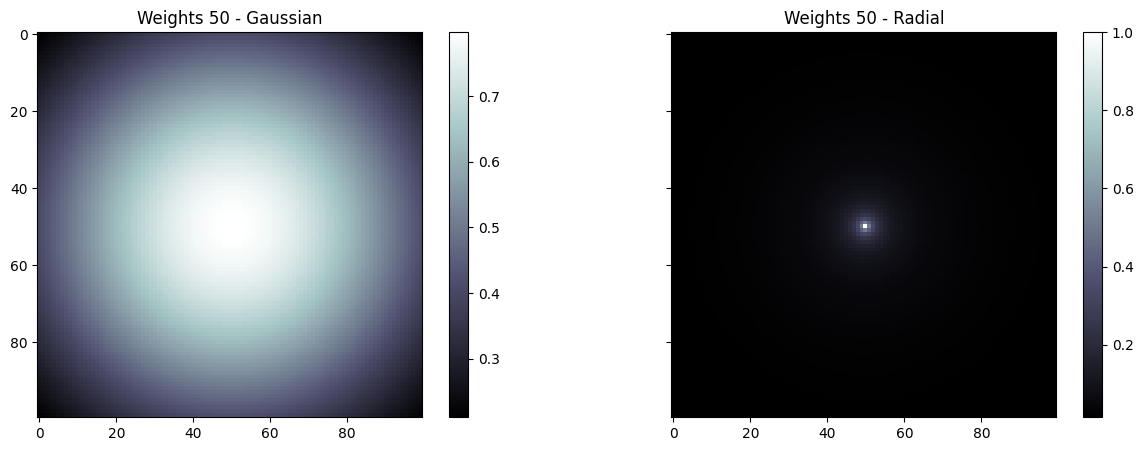

In [49]:
plot_panel("Weights 50", weights, 50)

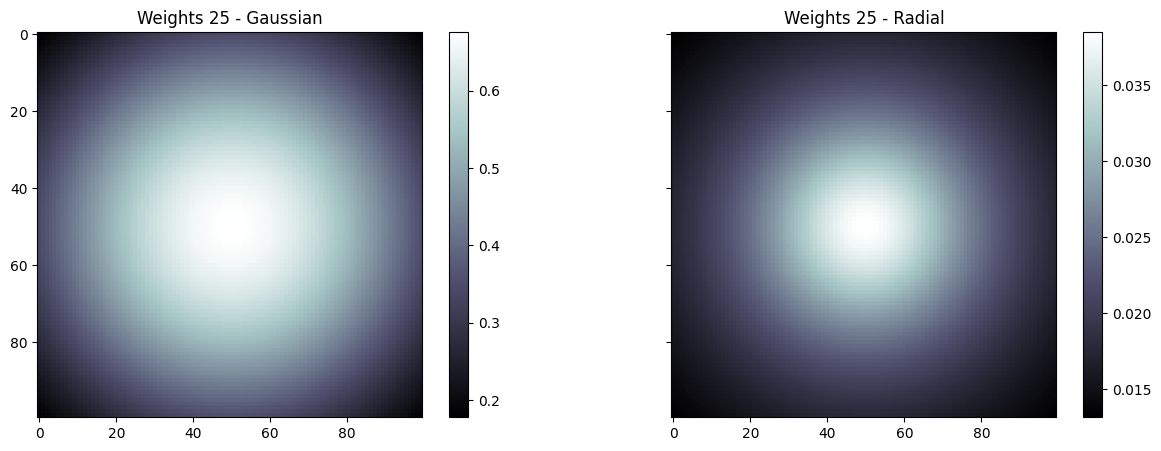

In [50]:
plot_panel("Weights 25", weights, 25)

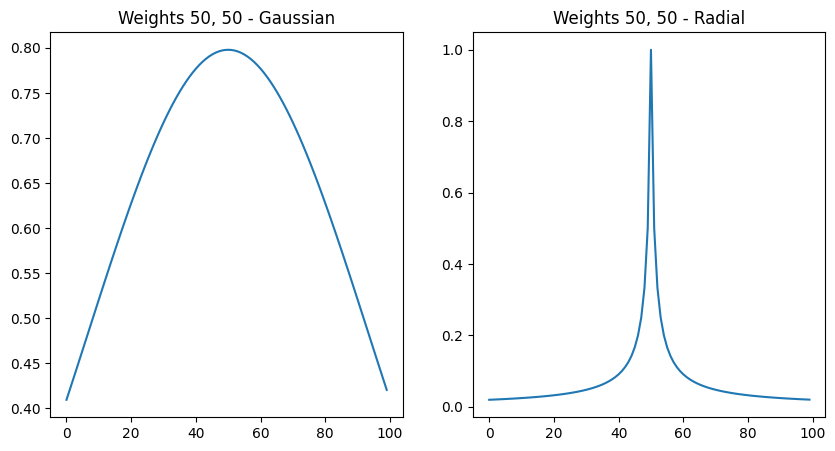

In [51]:
plot_lines("Weights 50, 50", weights, 50, 50)

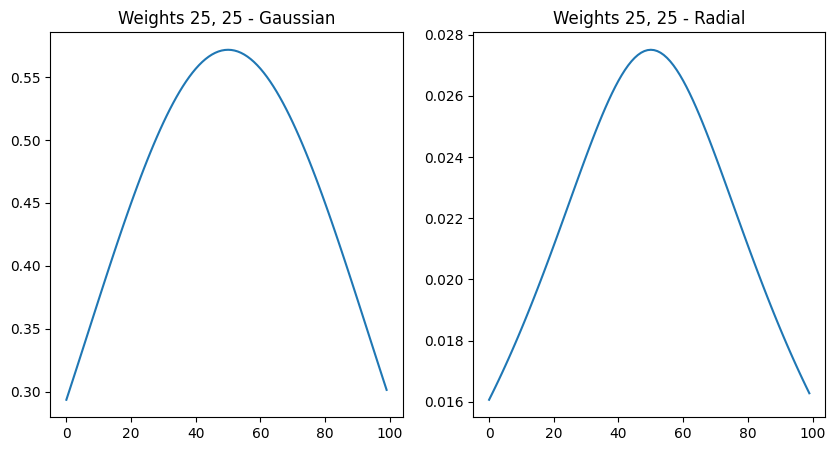

In [52]:
plot_lines("Weights 25, 25", weights, 25, 25)